# Исследование объявлений о продаже квартир 

В распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
* Цель исследования — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
* Описание данных:
<p>По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. 

In [1]:
import pandas as pd 

## 1. Обзор данных 

In [3]:
df=pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
df.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.387991
floors_total            0.003629
living_area             0.080299
floor                   0.000000
is_apartment            0.882906
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.486054
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

<b>Вывод:</b> Первичное изучение данных показало наличие проблем с форматами данных, а также наличие пустых значений

## 2.Предобработка данных

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Если балкон не указан, то скорее всего его нет, поэтому можно заменить пустые значения на ноль и изменить формат на int

In [10]:
df['balcony'] = df['balcony'].fillna(0).astype(int)
print('сумма пропусков:',df['balcony'].isna().sum()) #Проверим выполнение операции
print(df['balcony'].dtypes)

сумма пропусков: 0
int32


Нужно проверить пустые значения в parks_around3000. Судя по всему,отсутствие данных говорит о том, что парков в районе 3 км нет вовсе. Кроме того, отсутствие данных в parks_nearest связано с нулями в parks_around3000. Т.е. если парков в районе 3 км нет, то и расстояние до ближайшего нет. Поэтому пропуски в parks_around3000 можно заменить на ноль и привести к формату int.

In [11]:
df[df['parks_around3000']==0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.50,9.0,43.6,7,NaN,...,6.5,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.0,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.6,0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.0,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.6,1,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,...,11.0,2,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23688,19,9200000.0,101.0,2019-04-01T00:00:00,3,3.05,15.0,63.0,12,NaN,...,15.0,0,Санкт-Петербург,15632.0,14428.0,0.0,NaN,0.0,NaN,23.0


Далее заменим пропущенные значения на ноль в других столбцах. При необходимости в дальнейшем нулевые значения можно отфильтровать.

In [12]:
df[['parks_around3000', 'parks_nearest', 'ponds_around3000','ponds_nearest','airports_nearest', 'cityCenters_nearest','floors_total']] = df[['parks_around3000', 'parks_nearest', 'ponds_around3000','ponds_nearest','airports_nearest', 'cityCenters_nearest','floors_total']].fillna(0).astype(int)

Пропуски в ceiling_height заменим на медианное значение, а пропуски в is_apartment на False

In [14]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
df['is_apartment'] = df['is_apartment'].fillna(False)
df['ceiling_height'] = df['ceiling_height'].astype(int) 

In [15]:
df.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height            int32
floors_total              int32
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int32
locality_name            object
airports_nearest          int32
cityCenters_nearest       int32
parks_around3000          int32
parks_nearest             int32
ponds_around3000          int32
ponds_nearest             int32
days_exposition         float64
dtype: object

In [16]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             49
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3181
dtype: int64

Поменяем формат данных в first_day_exposition на datetime

In [18]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['last_price'] = df['last_price'].astype(int)

<b>Вывод:</b> На этапе предобработки данных были заполнены пропуски в зависимости от содержимого, а также изменены форматы данных

## 3. Декомпозиция 

Добавим столбец со значениями цены за квадратный метр

In [19]:
df['price_per_square'] = (df['last_price'] / df['total_area']).astype(int)

Далее добавим столбцы с днями недели, месяцами и годами размещения объявления, опираясь на данные датафрейма.

In [21]:
df['weekday_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year

Создадим функцию, которая присвоит категорию этажа 

In [22]:
def var(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [23]:
df['floor_var'] = df.apply(var, axis=1) #Выполняем функцию для строки

Далее нужно добавить столбцы с необходимыми соотношениями

In [26]:
df['living_to_total%'] = (df['living_area'] / df['total_area']).round(2) # Отношение жилой площади к общей с округлением 
df['kitchen_to_total%'] = (df['kitchen_area'] / df['total_area']).round(2)# Отношение  площади кухни к общей с округлением 

<b>Вывод:</b>
На данном этапе были добавлены в основной датафрейм необходимые расчеты. С помощью pd.DatetimeIndex были выведены в отдельные столбцы день недели, месяц и год публикации. Затем была создана функция var для того чтобы присвоить категорию этажа. После были проведены расчеты, результатом которых стали отношения жилой площади к общей с округлением и площади кухни к общей с округлением.

## 4.EDA

Необходимо рассмотреть характер распеределения значений общей площади 

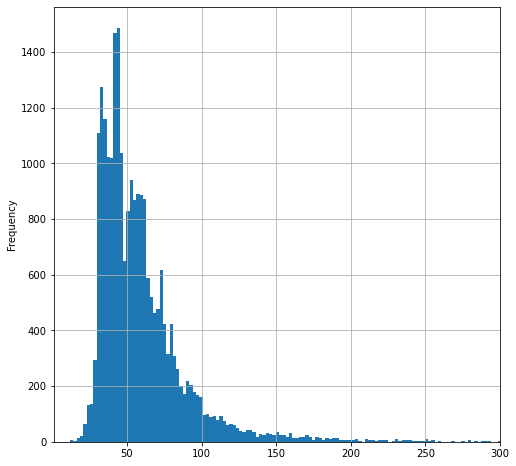

In [27]:
df['total_area'].plot( kind='hist', bins=400, grid=True,figsize=(8,8), xlim=(1,300))
print('')

Распределение имеет черты нормального

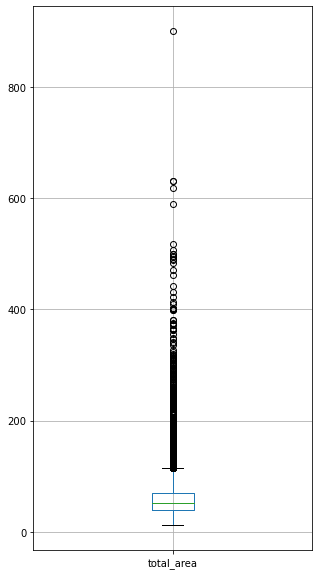

In [28]:
df.boxplot('total_area', grid=True, figsize=(5,10)) # Определяем выбросы
print('')

Определим  верхнюю границу выбросов 

In [31]:
upper_bound_total_area = df['total_area'].quantile(0.75)+1.5*(df['total_area'].quantile(0.75) - df['total_area'].quantile(0.25))
upper_bound_total_area.round() # Значения выше этой границы можно отсеять

115.0

In [34]:
good_df = df[df['total_area'] < 115] # Создаем переменную в которой будем хранить базу данных без выбросов 
good_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square,weekday_exposition,month_exposition,year_exposition,floor_var,living_to_total%,kitchen_to_total%
0,20,13000000,108.0,2019-03-07,3,2,16,51.0,8,False,...,2,755,NaN,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2,11,18.6,1,False,...,0,0,81.0,82920,1,12,2018,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2,5,34.3,4,False,...,2,574,558.0,92785,3,8,2015,другой,0.61,0.15
4,2,10000000,100.0,2018-06-19,2,3,14,32.0,13,False,...,1,48,121.0,100000,1,6,2018,другой,0.32,0.41
5,10,2890000,30.4,2018-09-10,1,2,12,14.4,5,False,...,0,0,55.0,95065,0,9,2018,другой,0.47,0.30


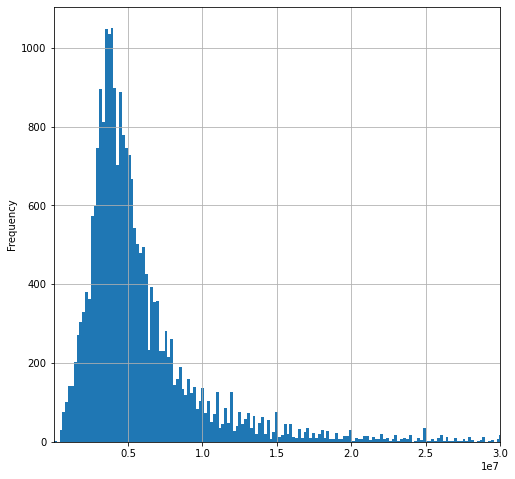

In [35]:
df['last_price'].plot(kind='hist', bins=4000, figsize=(8,8), grid=True,xlim=(1,30000000))
print('')

Данное распределение также похоже на нормальное. Имеется длинный хвост значений 

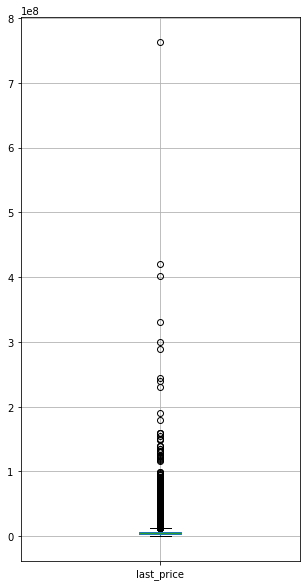

In [36]:
df.boxplot('last_price', grid=True, figsize=(5,10)) # Определяем выбросы
print('')

In [38]:
upper_bound_last_price = df['last_price'].quantile(0.75)+1.5*(df['last_price'].quantile(0.75) - df['last_price'].quantile(0.25))
upper_bound_last_price # Верхняя граница с которой начинаются выбросы

11900000.0

In [39]:
good_df = good_df[good_df['last_price'] < 11900000]

In [40]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

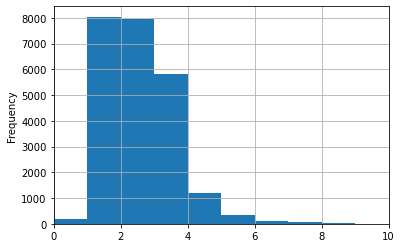

In [41]:
df['rooms'].plot(kind='hist', bins=df['rooms'].max(), xlim=(0,10), grid=True)
print('')

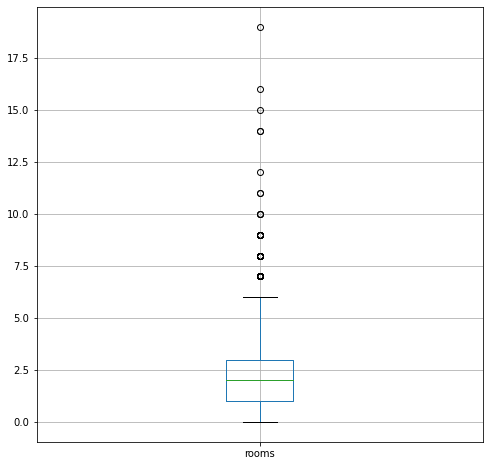

In [42]:
df.boxplot('rooms', grid=True, figsize=(8,8)) # Определяем выбросы
print('')

In [43]:
upper_bound_rooms = df['rooms'].quantile(0.75)+1.5*(df['rooms'].quantile(0.75) - df['rooms'].quantile(0.25)) #Определяем точное значение квантиля
upper_bound_rooms

6.0

^ Здесь можно увидеть, что большая часть жилья это квартиры с количеством комнат от 1 до 3. Принимая во внимание то, что нулевые значения это  могут быть квартиры студии, значения, больше 6  можно принять за выбросы.

In [45]:
good_df = good_df.query('not (rooms == 0 and studio == False)') # Исключим те пустые занчения в rooms, которые не являются студиями
good_df = good_df.query('rooms <= 6') # Отфильтруем данные, приняв за порог значение с которого начинаются выбросы 

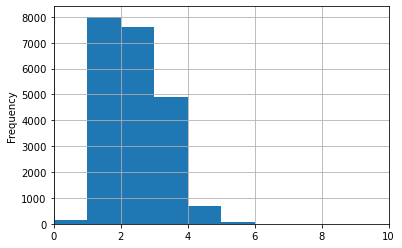

In [46]:
good_df['rooms'].plot(kind='hist', bins=good_df['rooms'].max(), xlim=(0,10), grid=True)
print('')

Оценим высоту потолков

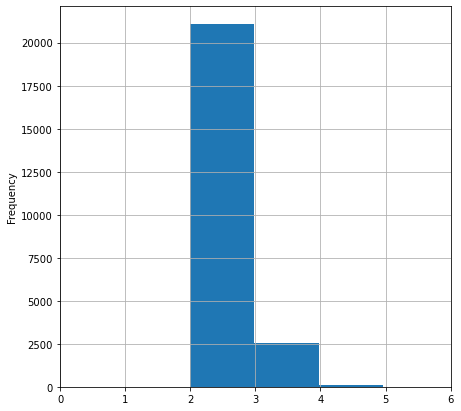

In [47]:
ceiling_height_plot = df['ceiling_height'] 
ceiling_height_plot.plot(kind='hist', bins=ceiling_height_plot.max(), xlim=(0,6), figsize=(7,7), grid=True)
print('')


 В соответствии с нормами жилого строительства высота потолков должна быть не менее 2.5 метров. Высота больше 4 метров встречается очень редко. Однако, мы имеем много медианных значений вместо пропусков, которые ровняются двум. Поэтому границы придется установить исходя из этого(от 2 до 4)

In [48]:
good_df = good_df.query('ceiling_height >= 2 and ceiling_height < 4')

Оценим как распределено количество дней размещения объявлений до снятия 

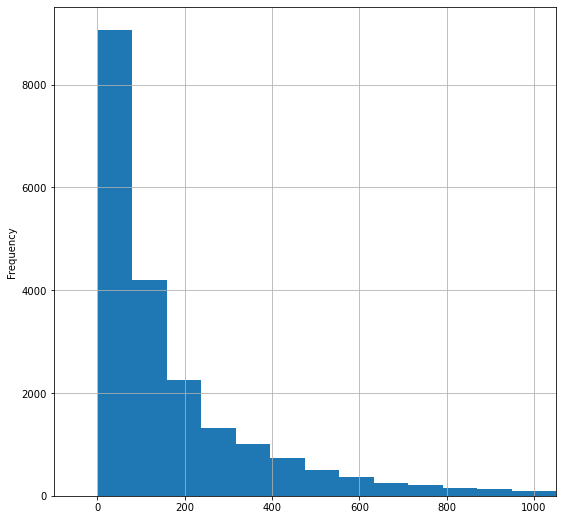

In [49]:
df['days_exposition'].plot(kind='hist', bins=20, xlim=(-100,1050), figsize=(9,9), grid=True)
print('')

Распределение похоже на распределение Пуассона.

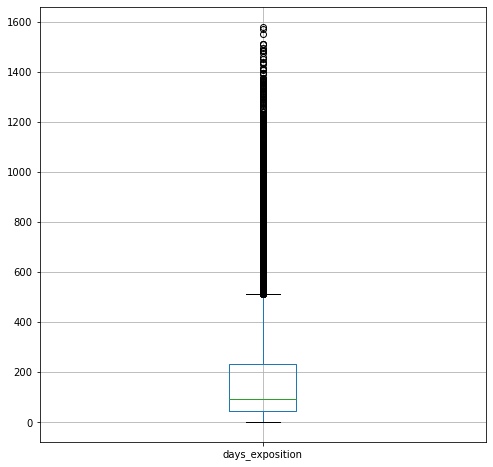

In [50]:
df.boxplot('days_exposition', grid=True, figsize=(8,8))# Проверим данные на выбросы с помощью ящика с усами 
print('')

In [51]:
upper_bound_days = df['days_exposition'].quantile(0.75)+1.5*(df['days_exposition'].quantile(0.75) - df['days_exposition'].quantile(0.25))
upper_bound_days

512.5

In [52]:
good_df = good_df.query('days_exposition < 512')

Далее необходимо проанализировать зависимость цены от других значений. Для этого можно использовать коофициент корреляции 

In [55]:
stat_multi = good_df[['last_price','total_area', 'rooms', 'cityCenters_nearest']]
stat_for_matrix = stat_multi.corr().drop(labels=['total_area', 'rooms', 'cityCenters_nearest'], axis=0)
stat_for_matrix


,last_price,total_area,rooms,cityCenters_nearest
last_price,1.0,0.699418,0.438752,0.103474


Цена на жилье имеет среднюю положительную корреляцию с общей площадью.(Чем больше площадь,тем выше цена)Можно сказать, что цена на жилье имеет небольшую положительную корреляцию с количеством комнат(чем больше комнат,тем выше цена).

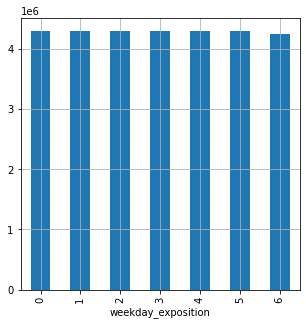

In [58]:
datetime_pivot = good_df.pivot_table(index=['weekday_exposition'], values='last_price', aggfunc=['mean', 'count', 'sum', 'median'])
datetime_pivot.columns = ['mean', 'count', 'sum', 'median']
datetime_pivot = datetime_pivot.sort_values(by='median' , ascending=False)
datetime_pivot['median'].plot(kind='bar', grid=True, figsize=(5,5))
print('')

Медианы показывают определенные  различия в зависимости от дня недели. Тем не менее можно сказать, что в воскресенье  медианное значение цены самое низкое. 

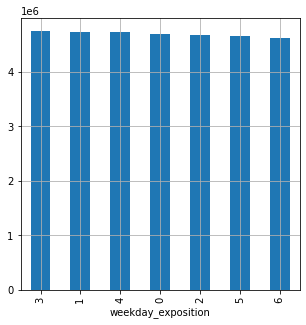

In [59]:
datetime_pivot = datetime_pivot.sort_values(by='mean', ascending=False)
datetime_pivot['mean'].plot(kind='bar', grid=True, figsize=(5,5))
print('')

В четверг среднее значение наибольшее, а в воскресенье наименьшее 

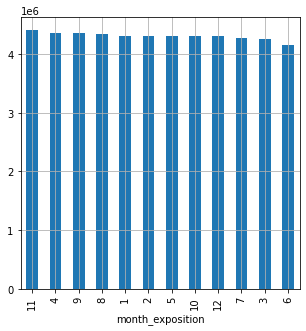

In [60]:
datetime_month_pivot = good_df.pivot_table(index=['month_exposition'], values='last_price', aggfunc=['mean', 'count', 'sum', 'median'])
datetime_month_pivot.columns = ['mean', 'count', 'sum', 'median']
datetime_month_pivot = datetime_month_pivot.sort_values(by='median' , ascending=False)
datetime_month_pivot['median'].plot(kind='bar', grid=True, figsize=(5,5))
print('')

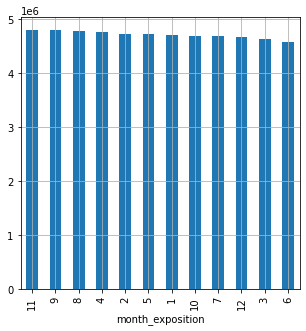

In [61]:
datetime_month_pivot = datetime_month_pivot.sort_values(by='mean', ascending=False)
datetime_month_pivot['mean'].plot(kind='bar', grid=True, figsize=(5,5))
print('')

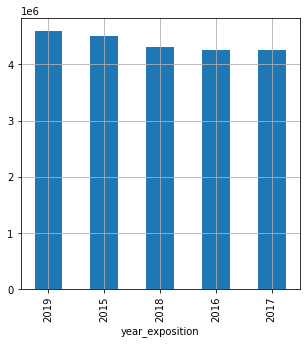

In [62]:
datetime_year_pivot = good_df.pivot_table(index=['year_exposition'], values='last_price', aggfunc=['mean', 'count', 'sum', 'median'])
datetime_year_pivot.columns = ['mean', 'count', 'sum', 'median']
datetime_year_pivot = datetime_year_pivot.sort_values(by='median' , ascending=False)
datetime_year_pivot['median'].plot(kind='bar', grid=True, figsize=(5,5))
print('')

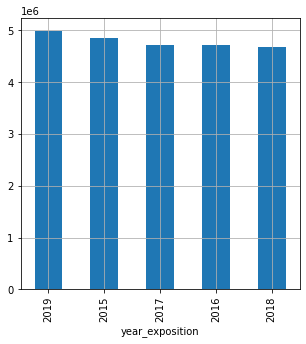

In [63]:
datetime_year_pivot = datetime_year_pivot.sort_values(by='mean' , ascending=False)
datetime_year_pivot['mean'].plot(kind='bar', grid=True, figsize=(5,5))
print('')

Далее рассмотрим статистику в зависимости от этажа 

In [64]:
floor_var_pivot = good_df.pivot_table(index='floor_var', values='last_price', aggfunc=['mean', 'count', 'sum', 'median'])
floor_var_pivot.columns = ['mean', 'count', 'sum', 'median']
floor_var_pivot

,mean,count,sum,median
floor_var,,,,
другой,4.899790e+06,12892,6.316809e+10,4500000
первый,3.944396e+06,2150,8.480450e+09,3700000
последний,4.380456e+06,2307,1.010571e+10,4000000


При сравнительно близких частотах жилье на первом этаже в среднем дешевле, чем жилье на последнем.

Теперь можно перейти к изучению локаций. Для этого создадим переменную в которую поместим срез из датафрейма и расчитаем нужные метрики

In [65]:
locality_pivot = good_df.pivot_table(index='locality_name', values='price_per_square', aggfunc=['count', 'mean','max','min'])# Создаем переменную и расчитаем метрики для цены на квадратный метр
locality_pivot.columns=['count', 'mean','max','min'] # Переименуем столбцы 
locality_top_count = locality_pivot.sort_values(by='count', ascending=False) # Отсортируем по убыванию 
display(locality_top_count.head(10))

,count,mean,max,min
locality_name,,,,
Санкт-Петербург,11108,104399.014494,312240,111
посёлок Мурино,478,85890.935146,138580,50000
посёлок Шушары,385,77939.374026,147826,47833
Всеволожск,303,66661.155116,136125,31400
Колпино,291,74507.917526,118694,47957
посёлок Парголово,284,89345.038732,138522,48405
Пушкин,257,99274.941634,166666,59836
деревня Кудрово,255,92424.474510,142857,54160
Гатчина,240,68287.612500,105818,10897


In [66]:
locality_top_count = locality_top_count.query('count > 187') # Поместим в переменную данные топ-10 локаций по частоте появления в датафрейме
locality_top_count = locality_top_count.sort_values(by='mean', ascending=False) # Отсортируем данные по среднему значению цены 

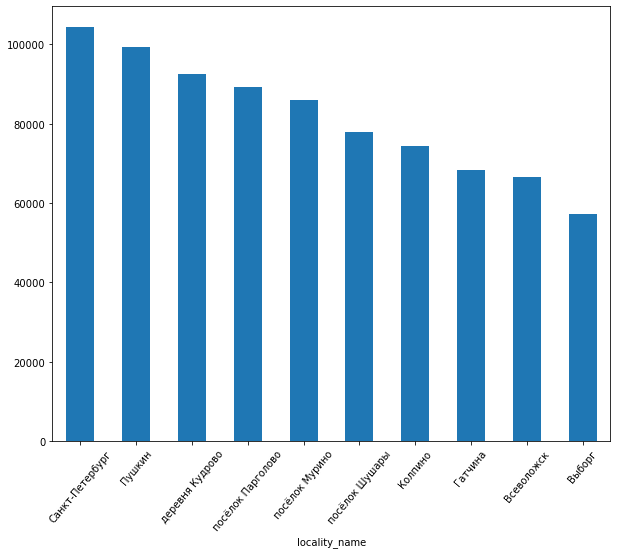

In [67]:
locality_top_count['mean'].plot(kind='bar', rot=50, figsize=(10,8))
print('')

Теперь рассмотрим расстояние до центра объектов недвижимости в Санкт-Петербурге

In [68]:
spb_locality = good_df[good_df['locality_name'] == 'Санкт-Петербург']
spb_locality = spb_locality[['locality_name', 'cityCenters_nearest','last_price']]
spb_locality = spb_locality.query('cityCenters_nearest != 0') # Исключим нулевые значения 
spb_locality['price_per_km'] =  (spb_locality['last_price'] / spb_locality['cityCenters_nearest']).round().astype(int)
spb_locality

,locality_name,cityCenters_nearest,last_price,price_per_km
4,Санкт-Петербург,8098,10000000,1235
9,Санкт-Петербург,15008,5400000,360
10,Санкт-Петербург,13878,5050000,364
15,Санкт-Петербург,14259,4650000,326
16,Санкт-Петербург,10698,6700000,626
...,...,...,...,...
23686,Санкт-Петербург,11602,3300000,284
23687,Санкт-Петербург,16704,3200000,192
23688,Санкт-Петербург,14428,9200000,638
23689,Санкт-Петербург,16081,3550000,221


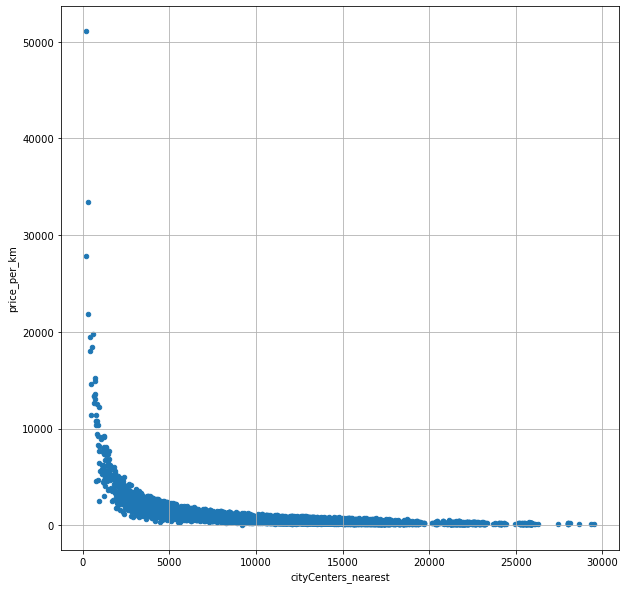

In [69]:
spb_locality.plot(kind='scatter', x='cityCenters_nearest', y='price_per_km', figsize=(10,10), grid=True)
print('')

Линия перегиба заметно выражена в пределе 5-6 км .Можно заметить, что  там цена начинает  расти быстрее чем при больших значениях. Можно предположить, что центр находится в радиусе 5 км.

Проанализируем показатели объектов недвижимости в центре Санкт-Петербурга

In [70]:
spb_center = good_df.query('cityCenters_nearest <= 5000') # Поместим в перменную срез данных с необходимыми условиями

In [71]:
spb_center_stat = spb_center[['last_price','total_area', 'rooms', 'cityCenters_nearest']]
center_for_matrix = spb_center_stat.corr().drop(labels=['total_area', 'rooms', 'cityCenters_nearest',], axis=0)
center_for_matrix


,last_price,total_area,rooms,cityCenters_nearest
last_price,1.0,0.657677,0.418082,0.686822


In [72]:
center_floor_var_pivot = spb_center.pivot_table(index='floor_var', values='last_price', aggfunc=['mean', 'count', 'sum', 'median'])
center_floor_var_pivot.columns=['mean', 'count', 'sum','median']
center_floor_var_pivot

,mean,count,sum,median
floor_var,,,,
другой,3.976333e+06,3425,1.361894e+10,3330000
первый,3.066113e+06,840,2.575535e+09,2592500
последний,3.550331e+06,889,3.156244e+09,2750000


In [73]:
display(stat_for_matrix) # корреляция по общей базе
display(center_for_matrix) # корреляция по центру

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.0,0.699418,0.438752,0.103474


,last_price,total_area,rooms,cityCenters_nearest
last_price,1.0,0.657677,0.418082,0.686822


Можно заметить, что корреляция цены и общей площади  в центре не сильно отличается от корреляции по общей базе. Здесь наблюдается положительная выраженная корреляция(чем больше общая площадь, тем выше цена). Корреляция цены и количества комнат схожа. Корреляция цены и расстояния до центра резко отличается.Она здесь средняя положительная(чем дальше от центра в пределах центра, тем выше цена). Скорее всего это связано с тем, что объектов недвижимости находящихся дальше от центра центра спб значительно больше и они перевешивают значение. 

In [74]:
display(floor_var_pivot) # метрики для этажа по общей базе
display(center_floor_var_pivot)# метрики для этажа по центру

,mean,count,sum,median
floor_var,,,,
другой,4.899790e+06,12892,6.316809e+10,4500000
первый,3.944396e+06,2150,8.480450e+09,3700000
последний,4.380456e+06,2307,1.010571e+10,4000000


,mean,count,sum,median
floor_var,,,,
другой,3.976333e+06,3425,1.361894e+10,3330000
первый,3.066113e+06,840,2.575535e+09,2592500
последний,3.550331e+06,889,3.156244e+09,2750000


Здесь мы можем увидеть, что средние значения  цены в центре  также различаются в зависимости от этажа как и по общей базе.

Медианное значение цена/день по общей базе


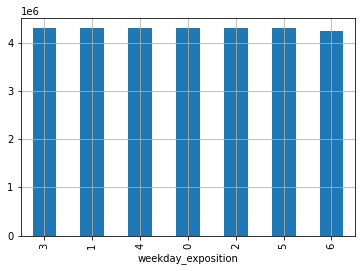

In [75]:
datetime_pivot = datetime_pivot.sort_values(by='median', ascending=False)
datetime_pivot['median'].plot(kind='bar', grid=True)
print('Медианное значение цена/день по общей базе')

Медианное значение цена/день по базе центра спб


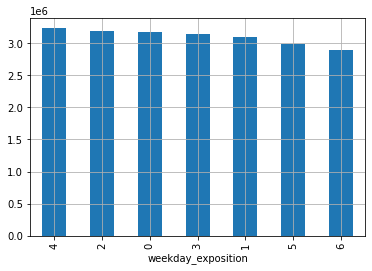

In [76]:
spb_center_pivot = spb_center.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['mean', 'count', 'sum', 'median'])
spb_center_pivot.columns=['mean', 'count', 'sum', 'median']
spb_center_pivot = spb_center_pivot.sort_values(by='median', ascending=False)
spb_center_pivot['median'].plot(kind='bar',grid=True,)
print('Медианное значение цена/день по базе центра спб')

Рейтинги медиан цена/день по общей базе и по центру спб имееют различия. В субботу самые низкие цены для двух баз. В центре спб-пятница самый дорогой день. По общей базе самый дорогой день это четверг.

Медианное значение цена/месяц по общей базе


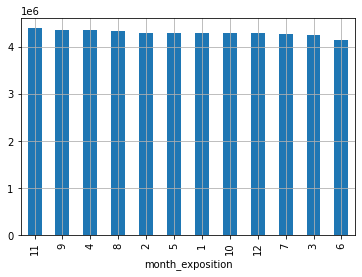

In [77]:
datetime_month_pivot = datetime_month_pivot.sort_values(by='median',ascending=False)
datetime_month_pivot['median'].plot(kind='bar', grid=True)
print('Медианное значение цена/месяц по общей базе')

Медианное значение цена/месяц по базе центра спб


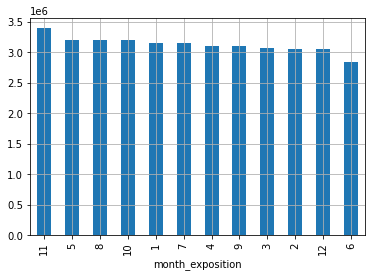

In [78]:
spb_center_pivot = spb_center.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean', 'count', 'sum', 'median'])
spb_center_pivot.columns=['mean', 'count', 'sum', 'median']
spb_center_pivot = spb_center_pivot.sort_values(by='median', ascending=False)
spb_center_pivot['median'].plot(kind='bar', grid=True)
print('Медианное значение цена/месяц по базе центра спб')

Рейтинг по месяцам тоже очень схож. Крайние значения совпадают.Есть некоторые различия в середине. В ноябре самые высокие цены, а в июне самые низкие как для центра так и для общей базы

Медианное значение цена/год по общей базе


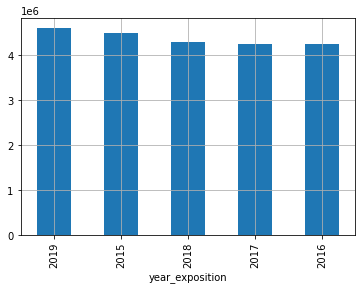

In [79]:
datetime_year_pivot = datetime_year_pivot.sort_values(by='median',ascending=False)
datetime_year_pivot['median'].plot(kind='bar', grid=True)
print('Медианное значение цена/год по общей базе')

Медианное значение цена/год по базе спб


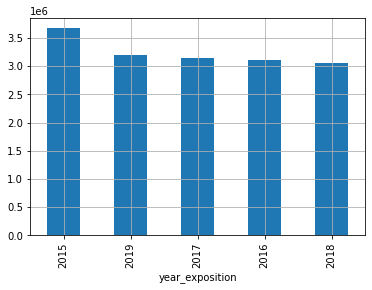

In [80]:
spb_center_pivot = spb_center.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean', 'count', 'sum', 'median'])
spb_center_pivot.columns=['mean', 'count', 'sum', 'median']
spb_center_pivot = spb_center_pivot.sort_values(by='median', ascending=False)
spb_center_pivot['median'].plot(kind='bar', grid=True)
print('Медианное значение цена/год по базе спб')

Рейтинг годов различается. Самый дорогой год  для общей базы был 2019, дешевлее жилье стоило в 2016. Для базы спб самый дорогой год 2015, а в 2018 цены ниже всех.

## 4.Итоги исследования

* В процессе работы над проектом на этапе предобработки данных были заполнены пропуски в зависимости от содержимого, а также изменены форматы данных. На следующем этапе  были добавлены в основной датафрейм необходимые расчеты. 
* С помощью pd.DatetimeIndex были выведены в отдельные столбцы день недели, месяц и год публикации. Затем была создана функция var для того чтобы присвоить категорию. На этапе исследовательского анализа данных было посчитано и добавлено в таблицу: цена квадратного метра
* посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления.
* Посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой.
* Посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей. 
* Также были изучены следующие параметры: площадь, цена, число комнат, высота потолков построены гистограммы для каждого параметра. Были выявлены некоторые аномальные значения и проведена работа над этим. 
* Затем был проанализровано время продажи объектов недвижимости и определены границы. Определенные в ходе работы границы значений различных показателей недвижимости могут лечь в основу системы обработки базы недвижимости. 
* После этого был проведен анализ факторов влияющих на стоимость объектов недвижимости. Для этого были составлены матрицы корреляции. А затем, после выделения объектов недвижимости, расположенных в центре Петербурга, было проведено сопоставление матриц зависимости цены от различных факторов общей базы данных и базы объектов в центре города.
* Анализ связи цены и времени размещения объявления выявил значительную схожесть и некоторые различия в показателях между общей базой и базой по центру спб. Конкретные выводы были приведены после каждого шага, требующего внимания.